In [35]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler


In [36]:
# data set 
dataset = pd.read_csv('unplugged.csv')[0:260]
del dataset['Comments']


In [37]:

gender = {'M': 1, 'F': 2}
dataset.Gender = [gender[item] for item in dataset.Gender]


resBefore = {'P': 1, 'F': 0}
dataset.Results_Before = [resBefore[item] for item in dataset.Results_Before]


resAfter = {'P': 1, 'F': 0}
dataset.Results_After = [resAfter[item] for item in dataset.Results_After]






In [38]:
x = dataset.iloc[:, [2, 3, 4, 5, 6]].values
# x = StandardScaler().fit_transform(x)
from sklearn.preprocessing import normalize
data_scaled = normalize(x)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.head()



,0,1,2,3,4
0,0.945732,0.078811,0.000000,0.000000,0.315244
1,0.912871,0.182574,0.000000,0.000000,0.365148
2,0.924500,0.092450,0.000000,0.000000,0.369800
3,0.945732,0.078811,0.000000,0.000000,0.315244
4,0.878114,0.109764,0.109764,0.109764,0.439057


In [39]:
# pca = RandomizedPCA(n_components=50, whiten=True)
# vectorizer = CountVectorizer(min_df=1)
x

array([[12,  1,  0,  0,  4],
       [10,  2,  0,  0,  4],
       [10,  1,  0,  0,  4],
       ...,
       [10,  2,  1,  1,  5],
       [ 9,  2,  0,  0,  4],
       [ 9,  2,  1,  1,  4]], dtype=int64)

In [40]:
# X = vectorizer.fit_transform()
# X2 = pca.fit_transform(x)

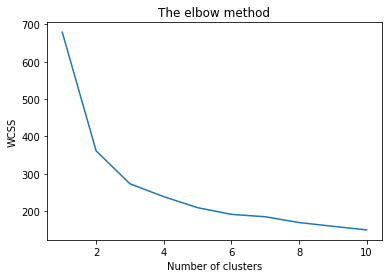

In [41]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [42]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(x)

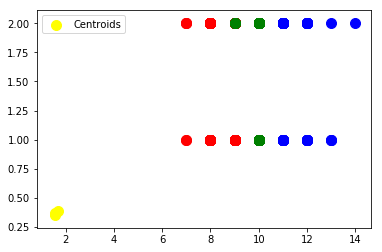

In [43]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = '')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = '')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = '')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,2], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [48]:
y_kmeans

array([1, 2, 2, 1, 0, 1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0, 2, 0, 1,
       2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 2, 0, 1, 2, 2, 0, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 1,
       0, 2, 1, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0, 0])

In [60]:
# prediction on a single data-instant
kmeans.predict([[10,  1,  0,  0,  4]])

array([2])